# TIME SERIES - ANALYSIS and FORECASTING

In [ ]:
# Time series forecasting is a techniques for the prediction of events through a sequence of time.
#The techniques predict future events by analyzing the trends of the past. Below is air passenger
#data that we will analyze and predict the number of passenger in future.

## 1.EDA

In [ ]:
#laoding useful packages libraries and importing data

import pandas as pd #data processing
import numpy as np  #linear algebra
import matplotlib.pyplot as plt #data visualization

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#For time series data, the index must be 'Date', now we convert date into index by using column "Month" to convert

import pandas as pd
import datetime

In [ ]:
#converting 'Month' as the object to datetime type

data.Month = pd.to_datetime(data.Month)

In [ ]:
dataset_ts=data.set_index("Month")
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


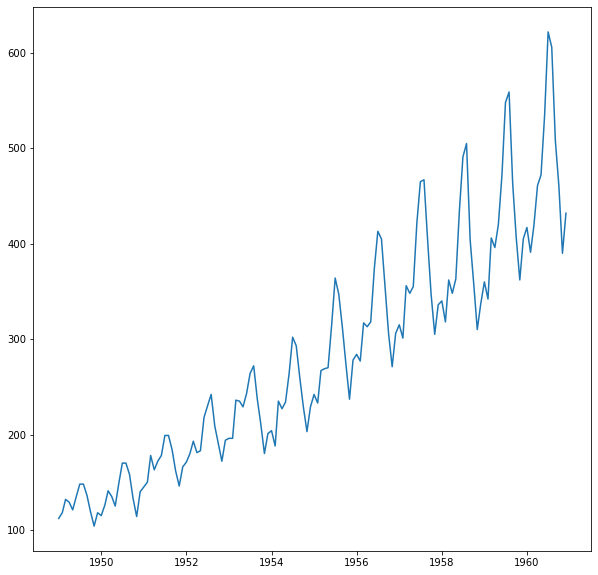

In [ ]:
#Ploting our data to see how it looks, and seeing that it is non-stationary data
plt.figure(figsize=(10,10))
plt.plot(dataset_ts["#Passengers"])

In [ ]:
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## 2. Decomposition of Time Series


In [ ]:
#Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
#The seasonal_decompose in statsmodels implements this conveniently.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#??seasonal_decompose

In [ ]:
pd.Series(dataset_ts["#Passengers"])

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

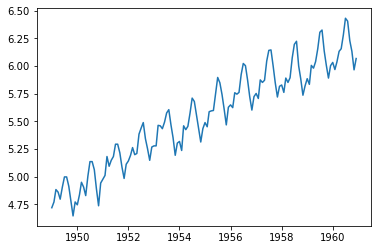

In [ ]:
# Because of the data is big magnitute we try to bring it to be smaller magitute by processing log function
ts_log = np.log(dataset_ts)
plt.plot(ts_log)

In [ ]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
??seasonal_decompose

In [ ]:

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

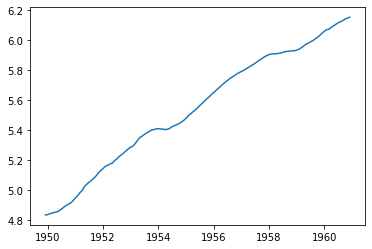

In [ ]:
plt.plot(ts_log.rolling(12).mean())

In [ ]:
residual.head(100)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1956-12-01   -0.008792
1957-01-01   -0.004277
1957-02-01   -0.032018
1957-03-01   -0.008046
1957-04-01   -0.010242
Name: resid, Length: 100, dtype: float64

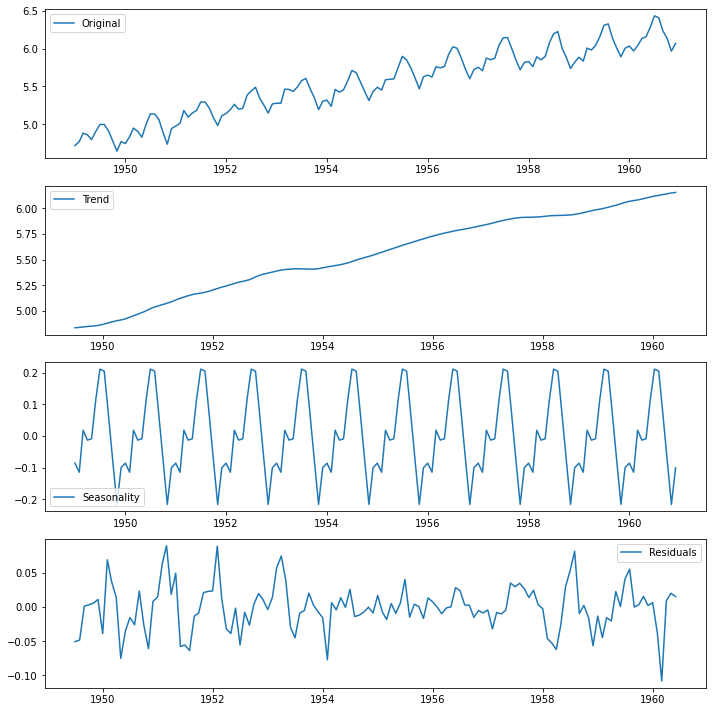

In [ ]:

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#3. Making Data from non-stationarity to stationarity by


In [ ]:
#a. differencing by shifting window 12 because of the cycle is 12 months

In [ ]:
dataset_ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
pd.concat([dataset_ts["#Passengers"],dataset_ts.shift(1)["#Passengers"],dataset_ts.shift(12)["#Passengers"]],axis=1)

,#Passengers,#Passengers,#Passengers
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,NaN
1949-03-01,132,118.0,NaN
1949-04-01,129,132.0,NaN
1949-05-01,121,129.0,NaN
...,...,...,...
1960-08-01,606,622.0,559.0
1960-09-01,508,606.0,463.0
1960-10-01,461,508.0,407.0


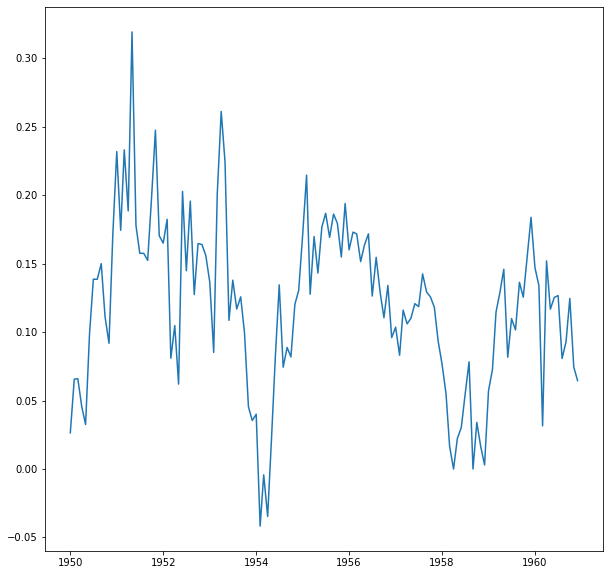

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.log(dataset_ts["#Passengers"]) - np.log(dataset_ts.shift(12)["#Passengers"]))

In [ ]:
ts_log_diff = np.log(dataset_ts["#Passengers"]) - np.log(dataset_ts.shift(12)["#Passengers"])

In [ ]:
ts_log_diff.dropna(inplace=True)

In [ ]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

In [ ]:
pd.concat([dataset_ts["#Passengers"],dataset_ts["#Passengers"].rolling(window=3).mean()],axis=1)

,#Passengers,#Passengers
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,120.666667
1949-04-01,129,126.333333
1949-05-01,121,127.333333
...,...,...
1960-08-01,606,587.666667
1960-09-01,508,578.666667
1960-10-01,461,525.000000


In [ ]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


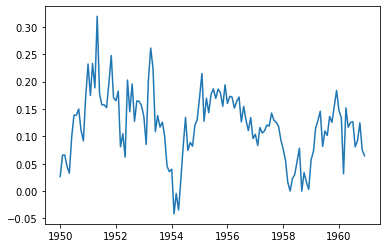

In [ ]:
ts_log_diff = ts_log["#Passengers"] - ts_log["#Passengers"].shift(12)



plt.plot(ts_log_diff)

In [ ]:
#a.1. DIFFRENCING by shifting window 2 to see it is still non-stationary

pd.concat([ts_log["#Passengers"] , ts_log["#Passengers"].shift(2)],axis=1)

,#Passengers,#Passengers
Month,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,NaN
1949-03-01,4.882802,4.718499
1949-04-01,4.859812,4.770685
1949-05-01,4.795791,4.882802
...,...,...
1960-08-01,6.406880,6.282267
1960-09-01,6.230481,6.432940
1960-10-01,6.133398,6.406880


In [ ]:
ts_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [ ]:
from datetime import datetime

datetime(1949,4,7)



datetime.datetime(1949, 4, 7, 0, 0)

# 4. Testing data whether it is stationary or not


In [ ]:
#After making data to be stationary we are not sure that it is a stationary or not, we need to test it by using the following approach.
#Rolling metrics
#ADF -- augmented dickey fuller test
#KPSS test
#PP test
#---------------------------------------------------------------------------------
#ACF PACF
#ljung Box hypothesis testing

#Adfuller testing or Hypothesis Testing
#The most favorite use of tesing

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
ts_log_diff.dropna(inplace=True)

In [ ]:
adfuller(ts_log_diff)

(-2.70957681898857,
 0.07239567181769463,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -424.76083484995365)

In [ ]:
ma = ts_log_diff.rolling(window=12).mean()
ms= ts_log_diff.rolling(window=12).std()

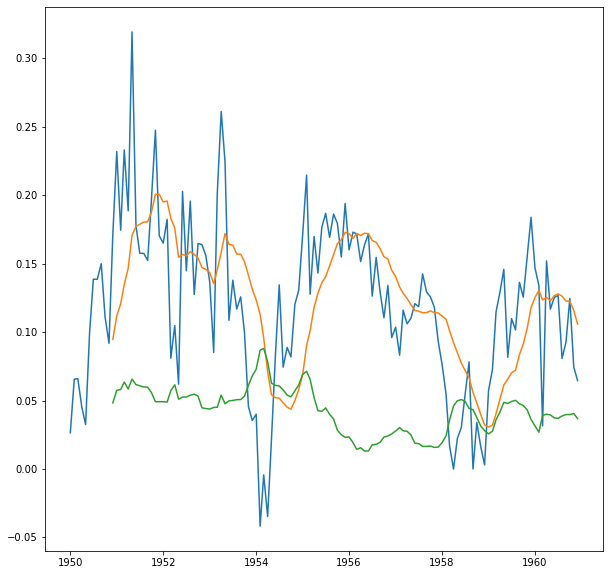

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ts_log_diff)
plt.plot(ma)
plt.plot(ms)

In [ ]:
from statsmodels.tsa.stattools import adfuller
#hypothesis test

#H0  -- not stationery  (reject NULL HYPOTHESIS)  --- p-value <.05 (reject)
#HA  -- stationery  (accept)
#??adfuller

In [ ]:
ts_log_diff.dropna(inplace=True)
adfuller(ts_log_diff, autolag='AIC')

(-2.70957681898857,
 0.07239567181769463,
 12,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -424.76083484995365)

In [ ]:
#abstract the complexity from end user: to make it easy for future testing with the same differenciation approach we create function as below:


def test_stationarity(timeseries):

    #Determing rolling statistics

   # rolmean = pd.rolling_mean(timeseries, window=12)

    #rolstd = pd.rolling_std(timeseries, window=12)

    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')


    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')

    plt.show(block=False)
    print("--------------------------------------------")
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    #PP
    #KPSS
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    #for key,value in dftest[4].items():
        #dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
??adfuller

In [ ]:
ts_log_diff

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

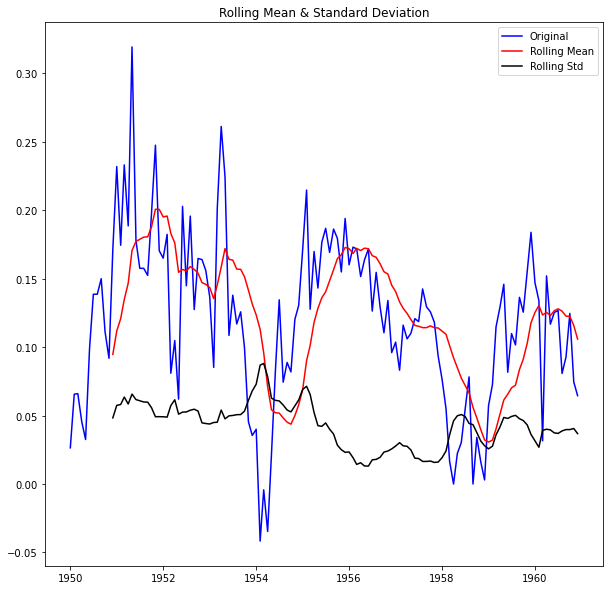

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.709577
p-value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
dtype: float64


In [ ]:
test_stationarity(ts_log_diff)


#as we can see above that p-value is
#p-value= 0.072396
#we can't reject NULL Hypothesis, i.e.
#timeseries is NOT Stationery
#Further Try to make it stationery using different approach now

In [ ]:
#a.2. DIFFRENCING by Moving Average

In [ ]:

ts_log_diff_ma = ts_log - ts_log.rolling(window=12).mean()
ts_log_diff_ma

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


#reverse engineering

ts_log_diff_ma  + ts_log.rolling(window=12).mean() = ts_log

np.exp(ts_log) = ts

In [ ]:
ts_log_diff_ma.dropna(inplace=True)

In [ ]:
ts_log_diff_ma

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


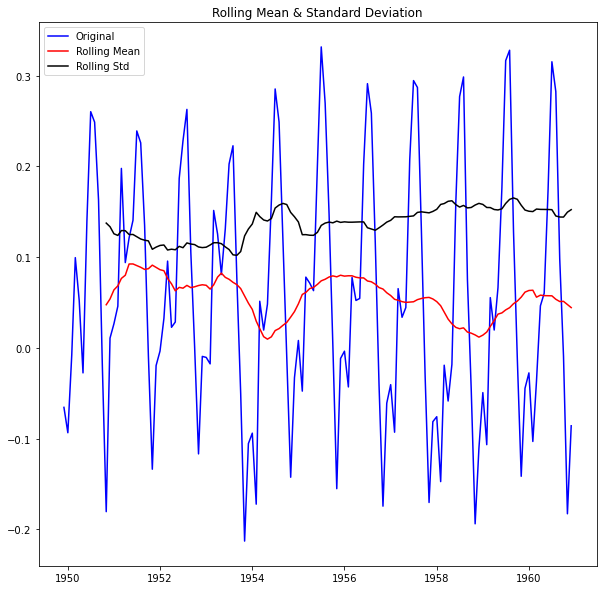

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
dtype: float64


In [ ]:
test_stationarity(ts_log_diff_ma["#Passengers"])

#Now as we can see above that p-value is
#p-value=0.022235
#we can reject NULL Hypothesis, i.e.
## timeseries is NOW Stationery

In [ ]:
#a.3. Alternative approach by using Exponential Moving Average

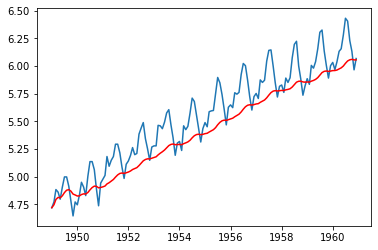

In [ ]:
#expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg = ts_log.ewm( halflife=12).mean()

## ??df_test_ewma = df_test.ewm(span=2).mean()


plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg

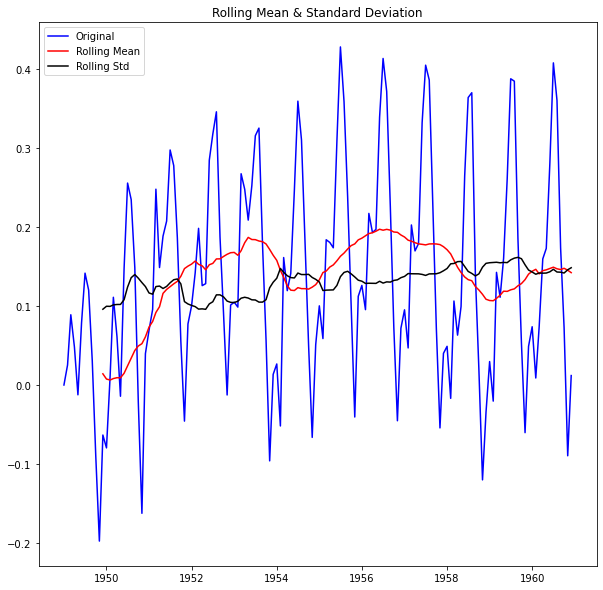

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


In [ ]:
#ts_log_moving_avg_diff
test_stationarity(ts_log_ewma_diff["#Passengers"])

#Now as we can see above that p-value is
#p-value=0.005
#we can reject NULL Hypothesis, i.e.
## timeseries is NOW Stationery

In [ ]:
#a.4. Alternative approach by using Residual

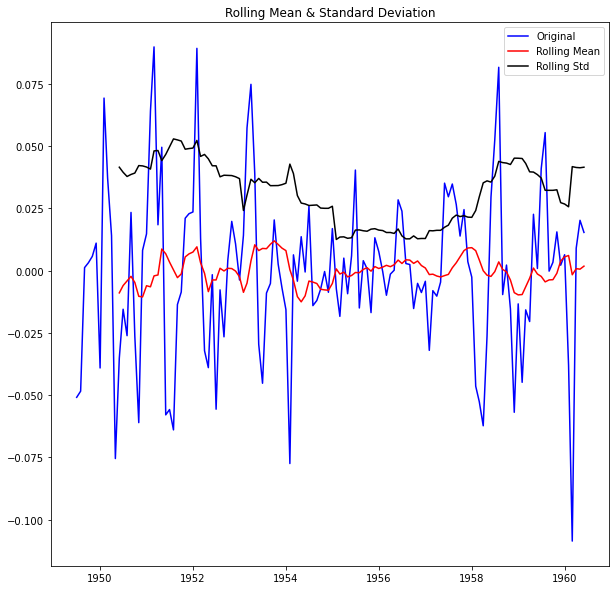

--------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
dtype: float64


In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

test_stationarity(ts_log_decompose)

#Now as we can see above that p-value is
#p-value=2.885
#we can reject NULL Hypothesis, i.e.
## timeseries is not Stationery

#-------------------------------------------------------------------------------

In [ ]:
ts_log_diff.dropna()

Month
1950-01-01    0.026433
1950-02-01    0.065597
1950-03-01    0.065958
1950-04-01    0.045462
1950-05-01    0.032523
                ...   
1960-08-01    0.080731
1960-09-01    0.092754
1960-10-01    0.124585
1960-11-01    0.074503
1960-12-01    0.064539
Name: #Passengers, Length: 132, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(ts_log_diff, nlags=20)

lag_pacf = pacf(ts_log_diff, nlags=20)


In [ ]:
lag_acf

array([ 1.        ,  0.71368757,  0.6230812 ,  0.48040492,  0.44128344,
        0.38664543,  0.3189496 ,  0.24168606,  0.19399261,  0.15275984,
       -0.00588527, -0.11491365, -0.24297138, -0.14327099, -0.14075053,
       -0.09882531, -0.14613051, -0.09637555, -0.11087538, -0.14085986,
       -0.15788444])

In [ ]:
lag_pacf

array([ 1.        ,  0.71913557,  0.23923066, -0.05841686,  0.1095545 ,
        0.04904601, -0.05935012, -0.06344005,  0.00708956, -0.00704255,
       -0.32554063, -0.18078124, -0.16838352,  0.33628558,  0.08463177,
        0.06113549, -0.05131591,  0.15849595, -0.06751134, -0.19484296,
       -0.04054063])

In [ ]:


import matplotlib.pyplot as pyplot

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf



![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# dataset here is  ---   ts_log_diff

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


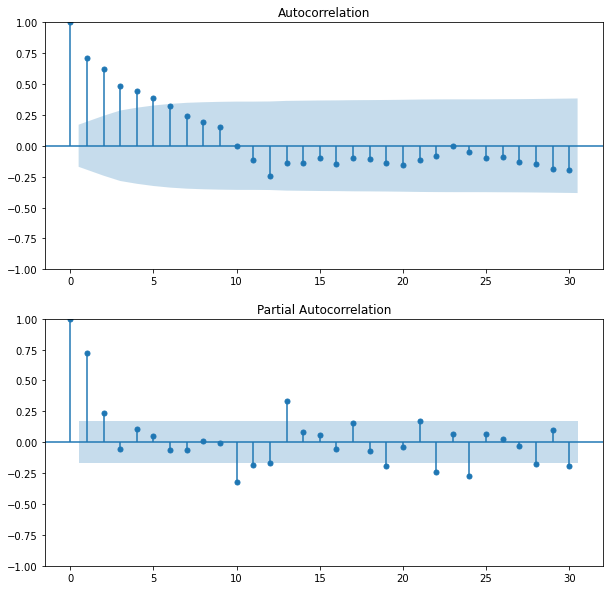

In [ ]:


pyplot.figure(figsize=(10,10))
pyplot.subplot(211)

plot_acf(ts_log_diff, ax=pyplot.gca(), lags = 30)



pyplot.subplot(212)

plot_pacf(ts_log_diff, ax=pyplot.gca(), lags = 30)

pyplot.show()

# ACF= 1,2,3
# PACF = 1,2

In [ ]:
ts_log_diff_ma.dropna(inplace=True)

In [ ]:
dataset_ts.head(50)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


# dataset here is  ---   ts_log_diff_ma

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


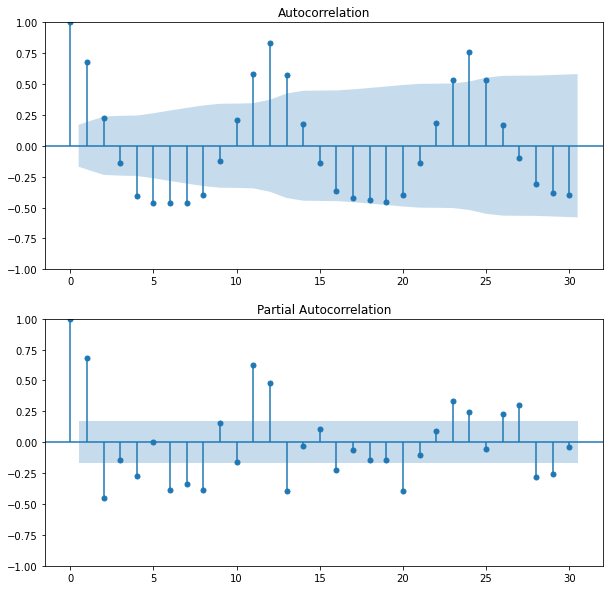

In [ ]:


pyplot.figure(figsize=(10,10))
pyplot.subplot(211)

plot_acf(ts_log_diff_ma, ax=pyplot.gca(), lags = 30)



pyplot.subplot(212)

plot_pacf(ts_log_diff_ma, ax=pyplot.gca(), lags = 30)

pyplot.show()



#ACF = 1,2
#PACF = 2,3

# ----------------------------------------------------------------------------------------------

# Modelling

# ML Models

1. Main Models
    * AR
    * MA
    * ARMA
    * ARIMA
    * SARIMA


2. EXPONENTIAL SMOTHING
    * EM model [single/double/triple]
    * EM -- HOLT WINTERS MODEL


3. Nueral Networks
    * RNN
    * LSTM
    
    

In [ ]:


from statsmodels.tsa.arima.model import  ARIMA

from random import random


??ARIMA

In [ ]:
model = ARIMA(ts_log_diff_ma , order=(3,0,0))   #AR MODEL

results_AR = model.fit()

results_AR.summary()
#AR =p
#I =d
#MA =q

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  133
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 135.736
Date:                Mon, 30 Jan 2023   AIC                           -261.472
Time:                        00:48:16   BIC                           -247.020
Sample:                    12-01-1949   HQIC                          -255.599
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0558      0.015      3.650      0.000       0.026       0.086
ar.L1          0.9124      0.090     10.161      0.000       0.736       1.088
ar.L2         -0.2836      0.141     -2.017      0.044      -0.559      -0.008
ar.L3         -0.1591      0.092     -1.728      0.084      -0.340       0.021
sigma2         0.0075      0.001      5.277      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 6.56
Prob(Q):                              0.66   Prob(JB):                         0.04
Heteroskedasticity (H):               1.16   Skew:                             0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model = ARIMA(ts_log_diff_ma , order=(0,0,3)) #MA MODEL

results_MA = model.fit()

results_MA.summary()
#AR =p
#I =d
#MA =q

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  133
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 138.770
Date:                Mon, 30 Jan 2023   AIC                           -267.540
Time:                        00:48:34   BIC                           -253.088
Sample:                    12-01-1949   HQIC                          -261.667
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0546      0.026      2.061      0.039       0.003       0.106
ma.L1          1.0637      0.092     11.551      0.000       0.883       1.244
ma.L2          0.6706      0.136      4.934      0.000       0.404       0.937
ma.L3          0.4634      0.091      5.082      0.000       0.285       0.642
sigma2         0.0072      0.001      5.670      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 6.27
Prob(Q):                              0.85   Prob(JB):                         0.04
Heteroskedasticity (H):               1.17   Skew:                             0.23
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# TEST AND TRAIN SPLIT

In [ ]:
ts_log_diff_ma

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
traindata = ts_log_diff_ma[:"1959-12-01"]

testdata = ts_log_diff_ma["1960-01-01":]


In [ ]:
testdata

,#Passengers
Month,
1960-01-01,-0.027530
1960-02-01,-0.103067
1960-03-01,-0.036530
1960-04-01,0.046332
1960-05-01,0.060186
1960-06-01,0.175033
1960-07-01,0.315151
1960-08-01,0.282363
1960-09-01,0.098235


![image.png](attachment:image.png)

In [ ]:
model = ARIMA(traindata , order=(2,0,3))  #ARMA

result_ARMA = model.fit()
result_ARMA.summary()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  121
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 147.310
Date:                Mon, 30 Jan 2023   AIC                           -280.620
Time:                        00:49:27   BIC                           -261.050
Sample:                    12-01-1949   HQIC                          -272.672
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.008      6.835      0.000       0.041       0.074
ar.L1          1.7314      0.011    162.044      0.000       1.710       1.752
ar.L2         -0.9922      0.011    -89.876      0.000      -1.014      -0.971
ma.L1         -1.1093      0.149     -7.457      0.000      -1.401      -0.818
ma.L2         -0.2098      0.147     -1.426      0.154      -0.498       0.079
ma.L3          0.6599      0.137      4.824      0.000       0.392       0.928
sigma2         0.0049      0.001      4.810      0.000       0.003       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                 2.26
Prob(Q):                              0.35   Prob(JB):                         0.32
Heteroskedasticity (H):               1.02   Skew:                            -0.09
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

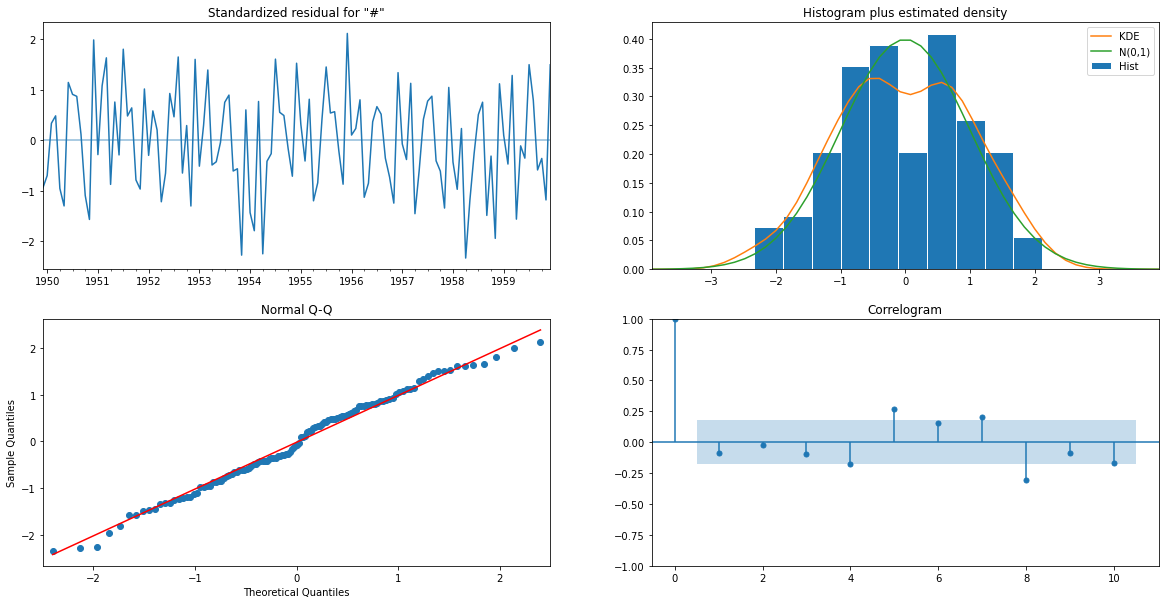

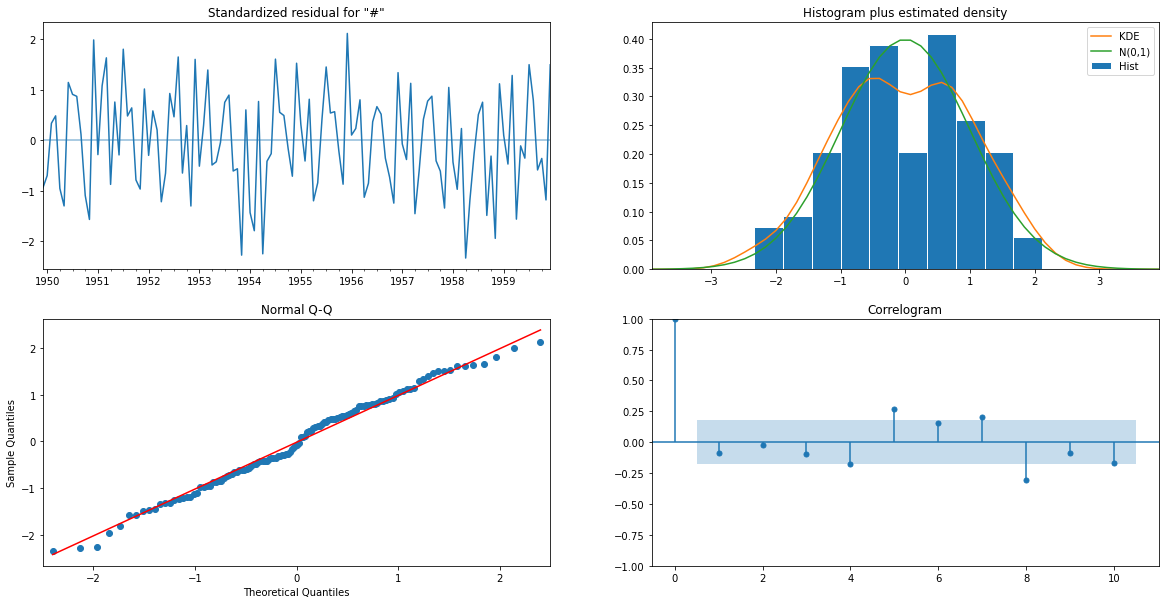

In [ ]:

result_ARMA.plot_diagnostics(figsize=(20,10))


#SIGNATURE

#ARIMAResults.plot_diagnostics(variable=0, lags=10, fig=None, figsize=None, truncate_endog_names=24,
#auto_ylims=False, bartlett_confint=False, acf_kwargs=None)¶


In [ ]:
#custom model
#y = 0.8699*(t-1) +  -0.3574 *(t-2) + -0.2657*(t-3)

traindata

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-08-01,0.327838
1959-09-01,0.128057
1959-10-01,-0.011315


# PREDICTION

In [ ]:
output = result.predict(start=121, end=132)
output

1960-01-01   -0.035983
1960-02-01   -0.079508
1960-03-01   -0.018379
1960-04-01    0.062143
1960-05-01    0.140907
1960-06-01    0.197386
1960-07-01    0.217025
1960-08-01    0.194991
1960-09-01    0.137354
1960-10-01    0.059424
1960-11-01   -0.018317
1960-12-01   -0.075597
Freq: MS, Name: predicted_mean, dtype: float64

# EVALUATION

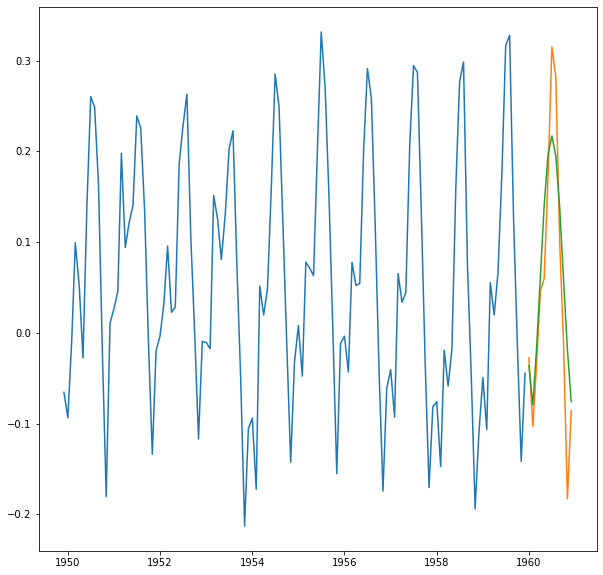

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(traindata)
plt.plot(testdata)
plt.plot(output)

# RMSE

In [ ]:

import numpy as np


RMSE = np.sqrt(np.mean((testdata["#Passengers"] - output)**2))

RMSE

0.07002983882492606

In [ ]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(testdata["#Passengers"] , output))

0.07002983882492606

# REVERSE ENGINEER DATASET

In [ ]:
predicteddata = result.predict(start=133, end=180)
predicteddata

1961-01-01   -0.097637
1961-02-01   -0.078965
1961-03-01   -0.024769
1961-04-01    0.050541
1961-05-01    0.127160
1961-06-01    0.185095
1961-07-01    0.209385
1961-08-01    0.193957
1961-09-01    0.143145
1961-10-01    0.070476
1961-11-01   -0.004927
1961-12-01   -0.063379
1962-01-01   -0.089769
1962-02-01   -0.077465
1962-03-01   -0.029977
1962-04-01    0.040035
1962-05-01    0.114136
1962-06-01    0.172971
1962-07-01    0.201314
1962-08-01    0.192013
1962-09-01    0.147787
1962-10-01    0.080442
1962-11-01    0.007722
1962-12-01   -0.051366
1963-01-01   -0.081521
1963-02-01   -0.075103
1963-03-01   -0.034071
1963-04-01    0.030602
1963-05-01    0.101867
1963-06-01    0.161087
1963-07-01    0.192912
1963-08-01    0.189256
1963-09-01    0.151351
1963-10-01    0.089347
1963-11-01    0.019605
1963-12-01   -0.039628
1964-01-01   -0.072987
1964-02-01   -0.071974
1964-03-01   -0.037121
1964-04-01    0.022217
1964-05-01    0.090375
1964-06-01    0.149510
1964-07-01    0.184269
1964-08-01 

In [ ]:
#TO BE CHECKED
#np.exp(traindata.cumsum() )

# ---------------------------------------------------------------------------

# ARIMA MODEL

In [ ]:

model = ARIMA((dataset_ts) , order=(1,2,1))   #ARIMA MODEL


#acf and pacf

results_ARIMA = model.fit()

#missing="drop"

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results_ARIMA.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.3130,0.100,3.127,0.002,0.117,0.509
ma.L1,-0.9998,5.909,-0.169,0.866,-12.581,10.581
sigma2,1033.9975,6148.839,0.168,0.866,-1.1e+04,1.31e+04


In [ ]:
#results_ARIMA.plot_diagnostics()

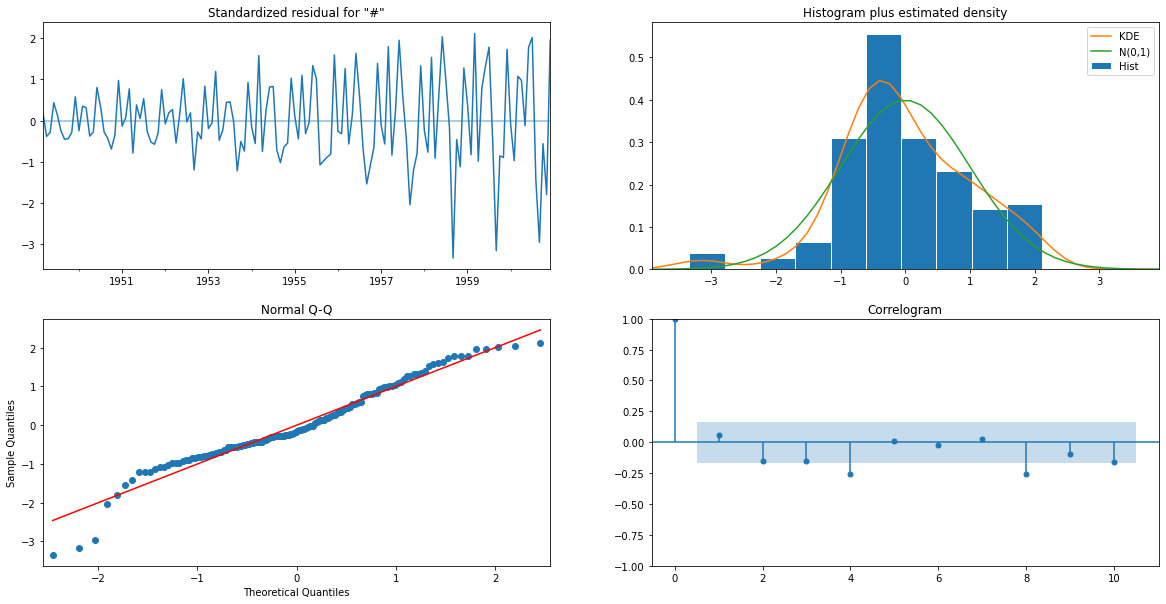

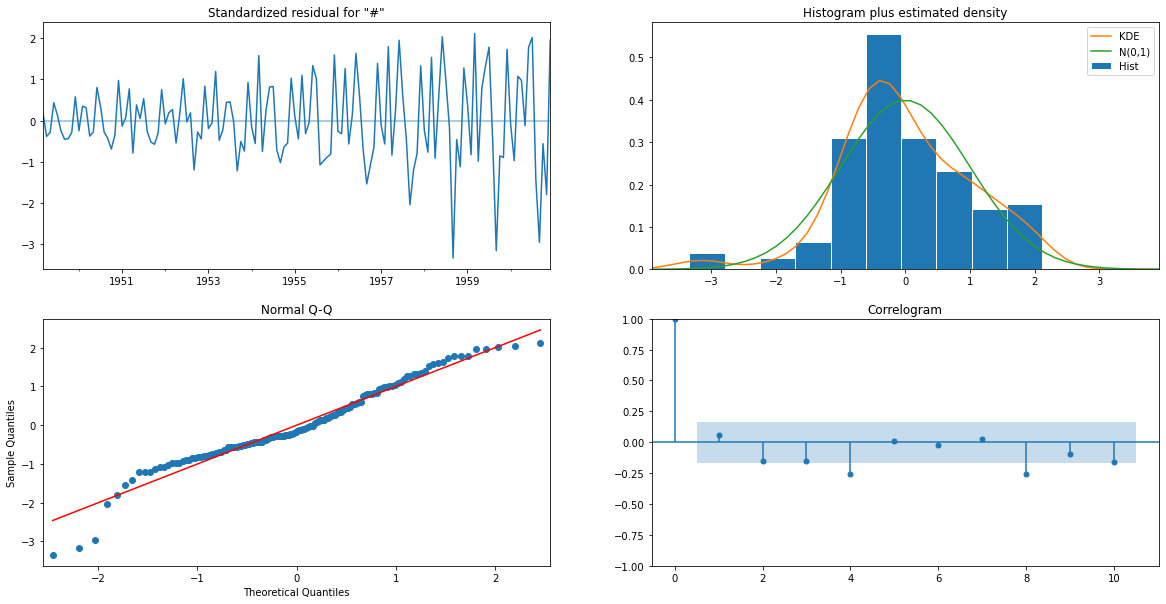

In [ ]:
results_ARIMA.plot_diagnostics(figsize=(20,10))

In [ ]:
results_ARIMA.fittedvalues

Month
1949-01-01      0.000000
1949-02-01    168.013789
1949-03-01    124.052927
1949-04-01    143.283931
1949-05-01    131.314091
                 ...    
1960-08-01    651.959957
1960-09-01    603.397055
1960-10-01    479.057651
1960-11-01    447.891089
1960-12-01    368.975026
Length: 144, dtype: float64

In [ ]:
# TO BE  CHECKED
#results_ARIMA.fittedvalues.cumsum() + 4.718499


# --------------------------------------------------------------------------------------------


# AUTO ARIMA

In [ ]:
# to install pyramid arima package
# pip install pmdarima --user

In [ ]:
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(ts_log, trace=True, error_action='ignore', suppress_warnings=True)




###stepwise

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-262.595, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-231.565, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-235.386, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-237.507, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-232.439, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-267.212, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-241.608, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-237.605, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-269.849, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-236.952, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-248.753, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-269.823, Time=0.45 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-250.735, Time=0.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : 

In [ ]:
result_aa = model.fit(ts_log)
result_aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 120.641
Date:                Mon, 30 Jan 2023   AIC                           -233.283
Time:                        00:56:37   BIC                           -221.403
Sample:                    01-01-1949   HQIC                          -228.456
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1597      0.097      1.640      0.101      -0.031       0.350
ar.L1          1.1935      0.095     12.588      0.000       1.008       1.379
ar.L2         -0.2225      0.096     -2.308      0.021      -0.411      -0.034
sigma2         0.0107      0.002      5.909      0.000       0.007       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.41
Prob(Q):                              0.86   Prob(JB):                         0.02
Heteroskedasticity (H):               1.13   Skew:                             0.22
Prob(H) (two-sided):                  0.66   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(ts_log_diff, trace=True, error_action='ignore', suppress_warnings=True)

result_aa_2 = model.fit(ts_log_diff)


###stepwise

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-455.363, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-358.005, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-452.647, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-406.130, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-152.756, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-455.568, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-440.803, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-457.177, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-457.354, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-458.262, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-456.821, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-455.358, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-450.923, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.045 seconds


In [ ]:
result_aa_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 233.131
Date:                Mon, 30 Jan 2023   AIC                           -458.262
Time:                        00:56:12   BIC                           -446.731
Sample:                    01-01-1950   HQIC                          -453.577
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0239      0.008      3.067      0.002       0.009       0.039
ar.L1          0.5542      0.074      7.519      0.000       0.410       0.699
ar.L2          0.2378      0.073      3.253      0.001       0.095       0.381
sigma2         0.0017      0.000      9.762      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.78
Prob(Q):                              0.94   Prob(JB):                         0.02
Heteroskedasticity (H):               0.40   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(ts_log_diff_ma, trace=True, error_action='ignore', suppress_warnings=True)

result_aa_3 = model.fit(ts_log_diff_ma)


###stepwise

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.447, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.169, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-246.526, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=0.41 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-282.537, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.801, Time=0.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [ ]:
#AIC, BIC, HQIC


result_aa_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 149.632
Date:                Mon, 30 Jan 2023   AIC                           -285.263
Time:                        00:57:08   BIC                           -265.031
Sample:                    12-01-1949   HQIC                          -277.042
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0258      0.006      4.164      0.000       0.014       0.038
ar.L1          0.7863      0.155      5.081      0.000       0.483       1.090
ar.L2          0.2893      0.204      1.419      0.156      -0.110       0.689
ar.L3         -0.5326      0.129     -4.139      0.000      -0.785      -0.280
ma.L1          0.0982      0.121      0.814      0.416      -0.138       0.335
ma.L2         -0.7531      0.089     -8.496      0.000      -0.927      -0.579
sigma2         0.0061      0.001      5.762      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 4.41
Prob(Q):                              0.58   Prob(JB):                         0.11
Heteroskedasticity (H):               1.06   Skew:                             0.08
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
### train data last date - 1960-12-01

dti = pd.date_range('1961-01-01', periods=50, freq='MS')
## MS means monthly or monthly start

dti


DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast = model.predict(n_periods=50)

forecast

1961-01-01    0.021407
1961-02-01    0.035573
1961-03-01    0.105669
1961-04-01    0.107788
1961-05-01    0.122185
1961-06-01    0.096785
1961-07-01    0.079850
1961-08-01    0.051518
1961-09-01    0.037871
1961-10-01    0.027965
1961-11-01    0.031318
1961-12-01    0.038358
1962-01-01    0.050138
1962-02-01    0.059652
1962-03-01    0.066791
1962-04-01    0.068881
1962-05-01    0.067523
1962-06-01    0.063258
1962-07-01    0.058398
1962-08-01    0.054066
1962-09-01    0.051526
1962-10-01    0.050864
1962-11-01    0.051916
1962-12-01    0.053905
1963-01-01    0.056125
1963-02-01    0.057886
1963-03-01    0.058853
1963-04-01    0.058941
1963-05-01    0.058352
1963-06-01    0.057399
1963-07-01    0.056432
1963-08-01    0.055710
1963-09-01    0.055371
1963-10-01    0.055410
1963-11-01    0.055727
1963-12-01    0.056168
1964-01-01    0.056586
1964-02-01    0.056873
1964-03-01    0.056985
1964-04-01    0.056934
1964-05-01    0.056772
1964-06-01    0.056571
1964-07-01    0.056394
1964-08-01 

In [ ]:

forecast = pd.DataFrame(forecast,index = dti,columns=['Prediction'])
forecast.head()

,Prediction
1961-01-01,0.021407
1961-02-01,0.035573
1961-03-01,0.105669
1961-04-01,0.107788
1961-05-01,0.122185


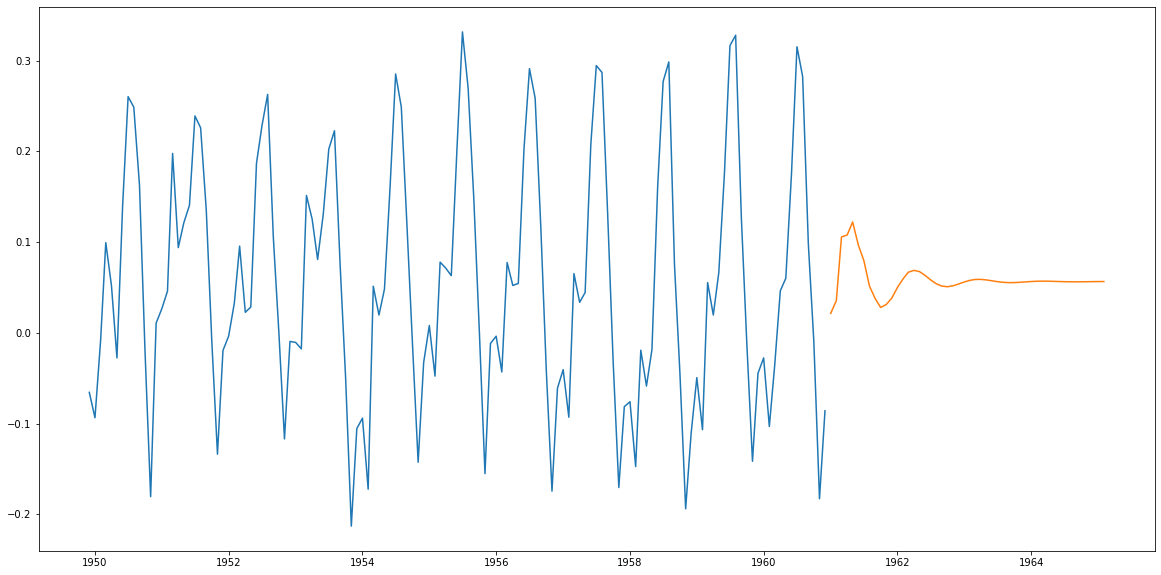

In [ ]:
plt.figure(figsize=(20,10))

#plot the predictions for validation set
plt.plot(ts_log_diff_ma["#Passengers"], label='Train')

#plt.plot(valid, label='Valid')

plt.plot(forecast, label='Prediction')


plt.show()